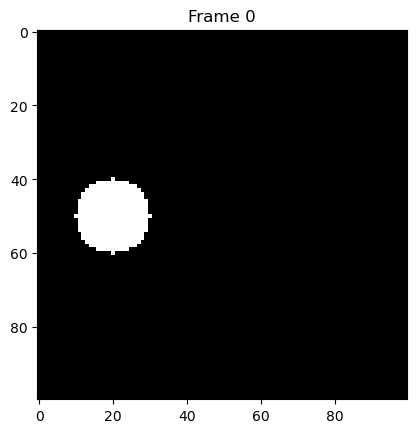

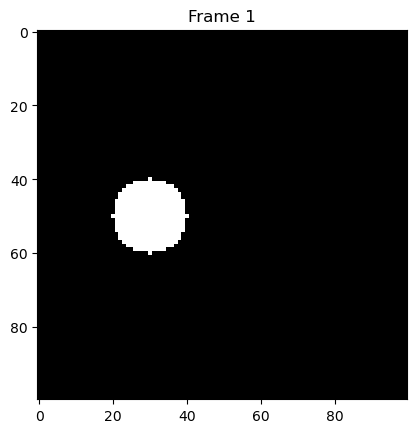

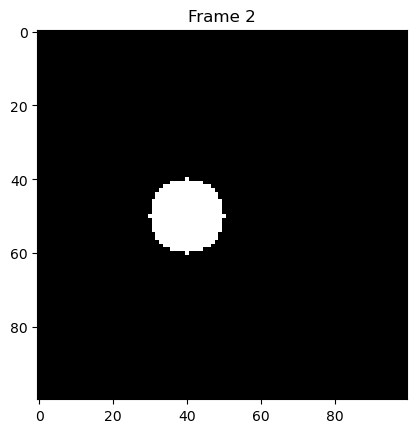

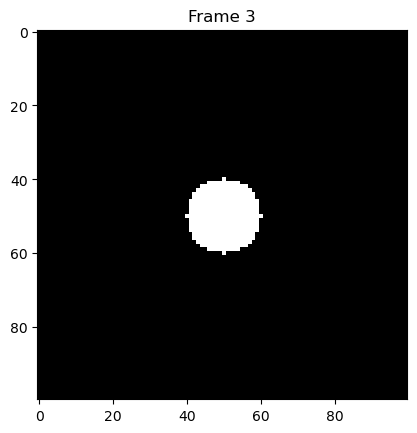

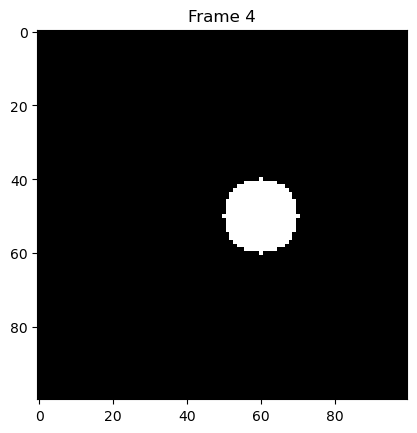

[INFO][2025/02/06 10:34:05 PM] Localizing objects from segmentation...


Starting cell tracking...


progress: 100%|██████████| 5/5 [00:00<00:00, 733.35it/s]
[INFO][2025/02/06 10:34:05 PM] Objects are of type: <class 'dict'>
[INFO][2025/02/06 10:34:05 PM] ...Found 5 objects in 5 frames.
[INFO][2025/02/06 10:34:05 PM] Loaded btrack: /opt/anaconda3/lib/python3.12/site-packages/btrack/libs/libtracker.dylib
[INFO][2025/02/06 10:34:05 PM] Starting BayesianTracker session
[INFO][2025/02/06 10:34:05 PM] Ending BayesianTracker session


Number of objects detected: 5
Initializing tracker configuration...
Error during tracking: name '__file__' is not defined
Failed to track cells: cannot access local variable 'tracks' where it is not associated with a value
Tracking function has been called.


In [15]:
import btrack
import numpy as np
import matplotlib.pyplot as plt
import os
from cachier import cachier
import datetime
import cv2

# Simulate a simple dataset: 5 frames with circles moving rightward
def simulate_segmented_images():
    frames = 5
    height, width = 100, 100
    segmented_images = np.zeros((frames, height, width), dtype=np.uint8)
    
    for t in range(frames):
        # Draw circles that shift position slightly in each frame
        center_x = 20 + t * 10
        cv2.circle(segmented_images[t], (center_x, 50), 10, 255, -1)
    
    return segmented_images

# Visualize simulated images to confirm
simulated_images = simulate_segmented_images()
for i, img in enumerate(simulated_images):
    plt.imshow(img, cmap='gray')
    plt.title(f"Frame {i}")
    plt.show()

# Validate Segmented Images Function
def validate_segmented_images(segmented_images):
    if segmented_images is None or not isinstance(segmented_images, np.ndarray) or segmented_images.ndim != 3:
        raise ValueError("Segmented images must be a 3D NumPy array (time, height, width).")

    if np.isnan(segmented_images).any() or np.isinf(segmented_images).any():
        raise ValueError("Segmented images contain NaN or Inf values.")

    valid_segmented_images = [img for img in segmented_images if np.any(img > 0)]
    if len(valid_segmented_images) == 0:
        raise ValueError("No valid segmented frames found for tracking.")

    return np.array(valid_segmented_images)

# Tracking Function
# Temporarily disable caching for debugging
# @cachier(stale_after=datetime.timedelta(days=3))
config_path = './config/btrack_config.json'
def track_cells(segmented_images):
    try:
        print("Starting cell tracking...")
        segmented_images = validate_segmented_images(segmented_images)
        
        FEATURES = ["area", "major_axis_length", "minor_axis_length", "orientation", "solidity"]
        objects = btrack.utils.segmentation_to_objects(segmented_images, properties=tuple(FEATURES))
        print(f"Number of objects detected: {len(objects)}")

        # Use a basic configuration provided by btrack
        try:
            with btrack.BayesianTracker() as tracker:
                print("Initializing tracker configuration...")
                config_path = os.path.join(os.path.dirname(__file__), 'config', 'btrack_config.json')
                print(f"Using configuration file from: {config_path}")
                tracker.configure(config_path)
                tracker.max_search_radius = 50
                tracker.tracking_updates = ["MOTION", "VISUAL"]
                tracker.features = FEATURES

                tracker.append(objects)
                tracker.volume = ((0, segmented_images.shape[2]), (0, segmented_images.shape[1]))

                tracker.track()
                tracks = tracker.tracks

                print(f"Tracking complete. Total Tracks Found: {len(tracks)}")
                for track in tracks[:5]:  # Display first 5 tracks for verification
                    print(f"Track ID: {track.ID}, Length: {len(track)}")
        except Exception as e:
            print(f"Error during tracking: {e}")

        return tracks

    except Exception as e:
        print(f"Failed to track cells: {e}")
        return []

# Run the tracking on simulated images
tracks = track_cells(simulated_images)
print("Tracking function has been called.")


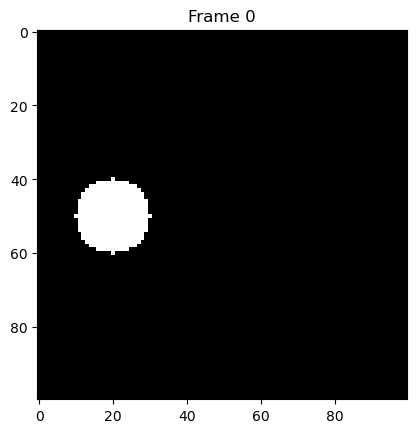

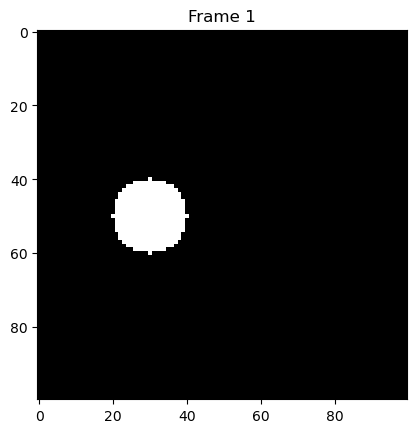

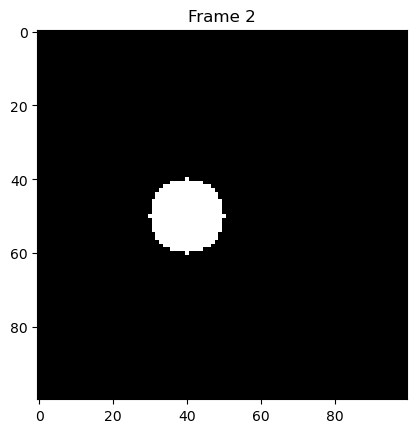

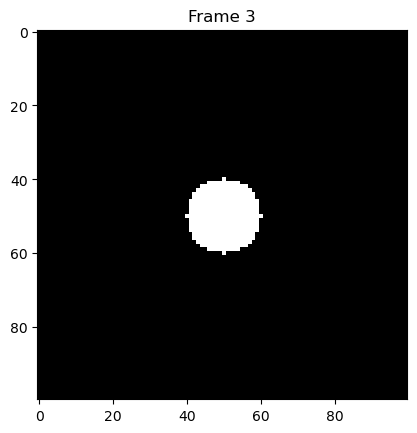

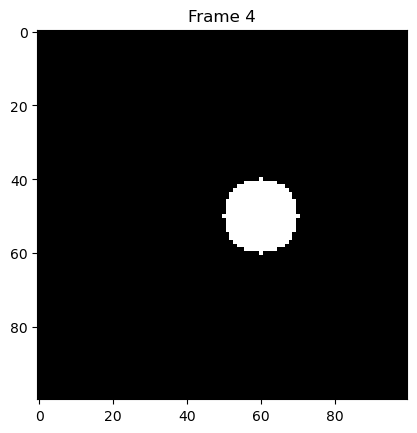

[INFO][2025/02/06 10:34:16 PM] Localizing objects from segmentation...


Starting cell tracking...


progress: 100%|██████████| 5/5 [00:00<00:00, 693.27it/s]
[INFO][2025/02/06 10:34:16 PM] Objects are of type: <class 'dict'>
[INFO][2025/02/06 10:34:16 PM] ...Found 5 objects in 5 frames.
[INFO][2025/02/06 10:34:16 PM] Loaded btrack: /opt/anaconda3/lib/python3.12/site-packages/btrack/libs/libtracker.dylib
[INFO][2025/02/06 10:34:16 PM] Starting BayesianTracker session
[INFO][2025/02/06 10:34:16 PM] Ending BayesianTracker session


Number of objects detected: 5
Initializing tracker configuration...
Failed to track cells: name '__file__' is not defined
Tracking function has been called.


In [16]:
import btrack
import numpy as np
import matplotlib.pyplot as plt
import os
from cachier import cachier
import datetime
import cv2

# Simulate a simple dataset: 5 frames with circles moving rightward
def simulate_segmented_images():
    frames = 5
    height, width = 100, 100
    segmented_images = np.zeros((frames, height, width), dtype=np.uint8)
    
    for t in range(frames):
        # Draw circles that shift position slightly in each frame
        center_x = 20 + t * 10
        cv2.circle(segmented_images[t], (center_x, 50), 10, 255, -1)
    
    return segmented_images

# Visualize simulated images to confirm
simulated_images = simulate_segmented_images()
for i, img in enumerate(simulated_images):
    plt.imshow(img, cmap='gray')
    plt.title(f"Frame {i}")
    plt.show()

# Validate Segmented Images Function
def validate_segmented_images(segmented_images):
    if segmented_images is None or not isinstance(segmented_images, np.ndarray) or segmented_images.ndim != 3:
        raise ValueError("Segmented images must be a 3D NumPy array (time, height, width).")

    if np.isnan(segmented_images).any() or np.isinf(segmented_images).any():
        raise ValueError("Segmented images contain NaN or Inf values.")

    valid_segmented_images = [img for img in segmented_images if np.any(img > 0)]
    if len(valid_segmented_images) == 0:
        raise ValueError("No valid segmented frames found for tracking.")

    return np.array(valid_segmented_images)

# Tracking Function
# Temporarily disable caching for debugging
# @cachier(stale_after=datetime.timedelta(days=3))
def track_cells(segmented_images):
    try:
        print("Starting cell tracking...")
        segmented_images = validate_segmented_images(segmented_images)
        
        FEATURES = ["area", "major_axis_length", "minor_axis_length", "orientation", "solidity"]
        objects = btrack.utils.segmentation_to_objects(segmented_images, properties=tuple(FEATURES))
        print(f"Number of objects detected: {len(objects)}")

        # Use a basic configuration provided by btrack
        with btrack.BayesianTracker() as tracker:
            print("Initializing tracker configuration...")
            config_path = os.path.join(os.path.dirname(__file__), 'config', 'btrack_config.json')
            tracker.configure(config_path)
            tracker.max_search_radius = 50
            tracker.tracking_updates = ["MOTION", "VISUAL"]
            tracker.features = FEATURES

            tracker.append(objects)
            tracker.volume = ((0, segmented_images.shape[2]), (0, segmented_images.shape[1]))
            
            tracker.track()
            tracks = tracker.tracks
        
        print(f"Tracking complete. Total Tracks Found: {len(tracks)}")
        for track in tracks:
            print(f"Track ID: {track.ID}, Track Length: {len(track)}")

        return tracks

    except Exception as e:
        print(f"Failed to track cells: {e}")
        return []

# Run the tracking on simulated images
tracks = track_cells(simulated_images)
print("Tracking function has been called.")
